Objective 1: Create a model that will predicting average price of homes in the future.

**1. Imports**

This is both an inferential and predictive analysis, therefore the following libraries and modules will be utilized in this project.

In [1]:
# Data cleaning
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Multiple regression
import statsmodels
from statsmodels.formula.api import ols


Load the data set ...

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The column description of the data set ...

* **id:** Unique identifier for a house.
* **date:** Date house was sold.
* **price:** Sale price (prediction target).
* **bedrooms:** Number of bedrooms.
* **bathrooms:** Number of bathrooms.
* **sqft_living:** Square footage of living space in the home.
* **sqft_lot:** Square footage of the lot.
* **floors:** Number of floors (levels) in house.
* **waterfront:** Houses with a view to a waterfront.
* **view:** Quality of view from the house.
* **condition:** How good the overall condition of the house is. Related to maintenance of house
* **grade:** Overall grade of the house, based on King County's grading system.
* **sqft_above:** Square footage of house apart from basement.
* **sqft_basement:** Square footage of the basement.
* **yr_built:** Year when house was built.
* **yr_renovated:** Year when house was renovated.
* **zipcode:** ZIP Code used by the United States Postal Service.
* **lat:** Latitude coordinate.
* **long:** Longitude coordinate.
* **sqft_living15:** The square footage of interior housing living space for the nearest 15 neighbors.
* **sqft_lot15:** The square footage of the land lots of the nearest 15 neighbors.

**2. Exploratory Data Analysis (EDA)**

Examine the data set to identify present inconsistencies.

Check for null values ...

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

null values detected. Calculate the frequency distribution of the variables to decide on the best solution for handling null values.

In [5]:
# Frequency distribution

for var in df: 
    
    print(df[var].value_counts()/np.float64(len(df)))

id
795000620     0.000139
8910500150    0.000093
7409700215    0.000093
1995200200    0.000093
9211500620    0.000093
                ...   
3649100387    0.000046
2767603649    0.000046
1446403617    0.000046
5602000275    0.000046
1523300157    0.000046
Name: count, Length: 21420, dtype: float64
date
6/23/2014    0.006575
6/25/2014    0.006066
6/26/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
               ...   
11/2/2014    0.000046
1/31/2015    0.000046
5/24/2015    0.000046
5/17/2014    0.000046
7/27/2014    0.000046
Name: count, Length: 372, dtype: float64
price
450000.0    0.007964
350000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
278800.0    0.000046
439888.0    0.000046
354901.0    0.000046
942000.0    0.000046
402101.0    0.000046
Name: count, Length: 3622, dtype: float64
bedrooms
3     0.454878
4     0.318655
2     0.127796
5     0.074131
6     0.012594
1     0.009075
7     0.001760
8     0.000602
9    

**3. Data cleaning**

Fill null values as follows:

- **waterfront:** create a new variable 'UNKNOWN'.

- **view:** fill na with the modal value.

- **yr_renovated:** fill na with 0 to indicate houses were never renovated.
    

In [6]:
# Fill na with a new variable
df['waterfront'] = df['waterfront'].fillna('UNKNOWN')

# Fill na with the modal value
view_mode = df['view'].mode()[0]
df['view'].fillna(view_mode, inplace= True)


# Fill na with 0 
df['yr_renovated'] = df['yr_renovated'].fillna('0')

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Check for duplicates ...

In [7]:
df.duplicated().sum()

0

there are no duplicated columns.

The 'id' column should serve as a unique identifier, check for duplicates in the 'id' column ...

In [8]:
id_duplicates = df['id'].nunique()
df_shape = df.shape

print(df_shape)
print(id_duplicates)

(21597, 21)
21420


the df rows are more than id unique values, this idicates existing duplicate rows. Check the nature of the duplicated rows ...

In [9]:
id_duplicates = df.groupby('id').filter(lambda x: len(x) > 1)
id_duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,UNKNOWN,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,UNKNOWN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


Sort the 'id' duplicated rows by date, keep the rows with the latest dates and drop the rest ...

In [10]:
# sort the df according to date
df = df.sort_values(by= 'date')

# reset the index and drop the old one
df = df.reset_index(drop= True)

# Drop rows with duplicate id but keep the last row
df = df.drop_duplicates(subset= 'id', keep= 'last')

df.shape

(21420, 21)

In [11]:
df.grade.value_counts()

grade
7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

Rename variables in the grade column.

In [12]:
# Replace integers with an empty string 
df['grade'] = df['grade'].str.replace(r'\d+', '', regex= True)
df.grade.value_counts()

grade
 Average        8889
 Good           6041
 Better         2606
 Low Average    1995
 Very Good      1130
 Excellent       396
 Fair            234
 Luxury           88
 Low              27
 Mansion          13
 Poor              1
Name: count, dtype: int64

In [13]:
df.view.value_counts()

view
NONE         19316
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: count, dtype: int64

Change all variables in the view column to 'YES', except for the 'NONE' variable, which will be renamed to 'NO'.

In [14]:
df['view'] = df['view'].apply(lambda x: 'YES' if x != 'NONE' else x)

df['view'] = df['view'].replace('NONE', 'NO')

df.view.value_counts()

view
NO     19316
YES     2104
Name: count, dtype: int64

**4. Feature engineering**

To reduce the number of columns, the following columns will be joined:

* total_sqft of the houses by adding the 'sqft_lot' to 'sqft_basement', then drop the 'sqft_above' and the 'sqft_basement' columns.
* house_age.
* month_sold.

In [15]:
# Convert non-numeric values to NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors= 'coerce')

# Fill NaN with the mode
basement_mode = df['sqft_basement'].mode()[0]
df['sqft_basement'] = df['sqft_basement'].fillna(basement_mode)

# Create 'total_sqft' column
df['total_sqft'] = df['sqft_lot'] + df['sqft_basement']

# Drop the 'sqft_above' and the 'sqft_basement' columns.
df = df.drop(columns= ['sqft_above', 'sqft_basement'])

# Add house age
df['house_age'] = 2024 - df['yr_built']

# Create new column for months
df['month_sold'] = pd.to_datetime(df['date']).dt.month
df['month_sold'] = df['month_sold'].astype(object)


Drop the following columns because they have little relevance to this analysis:

* zipcode
* lat
* long
* date
* sqft_living15
* sqft_lot15

Convert the following columns' dtypes: 

* id column to objects.
* bedroom and floors columns to the nearest int.

In [16]:
df['id'] = df['id'].astype(object)
df['yr_renovated'] = df['yr_renovated'].astype(int)
df[['bathrooms', 'floors']] = df[['bathrooms', 'floors']].round().astype(int)

df = df.drop(columns= ['zipcode', 'lat', 'long', 'date', 'sqft_living15', 'sqft_lot15'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21420 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21420 non-null  object 
 1   price         21420 non-null  float64
 2   bedrooms      21420 non-null  int64  
 3   bathrooms     21420 non-null  int32  
 4   sqft_living   21420 non-null  int64  
 5   sqft_lot      21420 non-null  int64  
 6   floors        21420 non-null  int32  
 7   waterfront    21420 non-null  object 
 8   view          21420 non-null  object 
 9   condition     21420 non-null  object 
 10  grade         21420 non-null  object 
 11  yr_built      21420 non-null  int64  
 12  yr_renovated  21420 non-null  int32  
 13  total_sqft    21420 non-null  float64
 14  house_age     21420 non-null  int64  
 15  month_sold    21420 non-null  object 
dtypes: float64(2), int32(3), int64(5), object(6)
memory usage: 2.5+ MB


**5. Summary statistics**

Get the summary statistics of the numeric dtypes ...

In [17]:
numeric_df = df.select_dtypes(include= 'number')

desc = numeric_df.describe()

numeric_df_median = numeric_df.median()
numeric_df_mode = numeric_df.mode().iloc[0]

# Add median and mode to the summary statistics
desc.loc['median'] = numeric_df_median
desc.loc['mode'] = numeric_df_mode

desc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,total_sqft,house_age
count,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000
mean,5.410746e+05,3.373950,2.061951,2083.132633,1.512804e+04,1.536461,1971.092997,68.956723,1.541394e+04,52.907003
std,3.678126e+05,0.925405,0.754611,918.808412,4.153080e+04,0.554534,29.387141,364.552298,4.153966e+04,29.387141
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,1900.000000,0.000000,5.200000e+02,9.000000
25%,3.230000e+05,3.000000,2.000000,1430.000000,5.040000e+03,1.000000,1952.000000,0.000000,5.317500e+03,27.000000
50%,4.500000e+05,3.000000,2.000000,1920.000000,7.614000e+03,2.000000,1975.000000,0.000000,7.900000e+03,49.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.069050e+04,2.000000,1997.000000,0.000000,1.106100e+04,72.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,2015.000000,2015.000000,1.651359e+06,124.000000
median,4.500000e+05,3.000000,2.000000,1920.000000,7.614000e+03,2.000000,1975.000000,0.000000,7.900000e+03,49.000000
mode,4.500000e+05,3.000000,2.000000,1300.000000,5.000000e+03,1.000000,2014.000000,0.000000,5.000000e+03,10.000000


the summary statistics show the presence of outliers in the numeric df ...

In [18]:
df.bathrooms.value_counts()

bathrooms
2    13745
1     3873
3     2515
4     1196
5       57
6       24
0        4
8        4
7        2
Name: count, dtype: int64

drop all the rows with 5, 6, 0, 8 and 7 bathrooms.

In [19]:
# Drop these bathroom rows
drop_bathrooms = [5, 6, 0, 8, 7]

# Filter out and drop the drop_bathrooms rows
df = df[~df['bathrooms'].isin(drop_bathrooms)]

df.bathrooms.value_counts() 

bathrooms
2    13745
1     3873
3     2515
4     1196
Name: count, dtype: int64

**6. Outliers**

Plot boxplots to check for more outliers ...

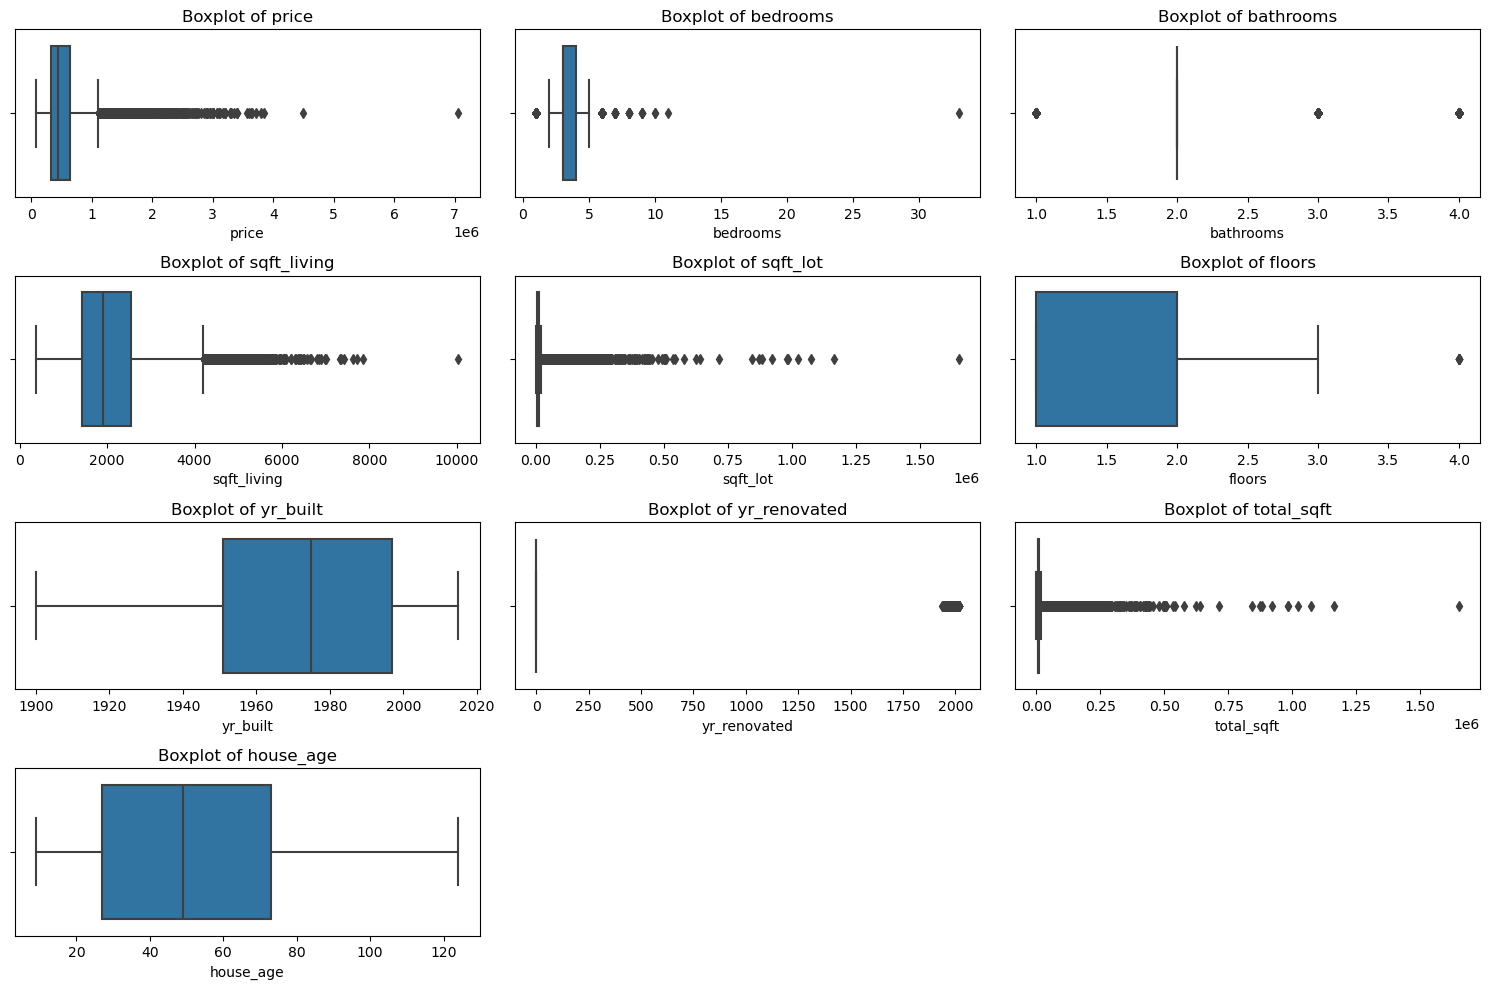

In [20]:
numeric_df = df.select_dtypes(include= 'number')

plt.figure(figsize= (15, 10))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x= numeric_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()

there is a heavy presence of outliers in some columns.

Due to the nature of this analysis, outliers in the following columns will be dropped:

* sqft_lot
* bedrooms

Drop the 'yr_renovated' column as most houses have not been renovated ...

In [21]:
outlier_df = df[['bedrooms', 'sqft_lot']]

# IQR for the selected columns
Q1 = outlier_df.quantile(0.25)
Q3 = outlier_df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundary
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((outlier_df < lower_bound) | (outlier_df > upper_bound)).any(axis= 1)
outlier_indices = outlier_df.index[outliers]

# Drop all the outliers
df = df.drop(outlier_indices)

# Drop yr_renovated as most houses are not renovated
df = df.drop(columns= ['yr_renovated'])
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 18525 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18525 non-null  object 
 1   price        18525 non-null  float64
 2   bedrooms     18525 non-null  int64  
 3   bathrooms    18525 non-null  int32  
 4   sqft_living  18525 non-null  int64  
 5   sqft_lot     18525 non-null  int64  
 6   floors       18525 non-null  int32  
 7   waterfront   18525 non-null  object 
 8   view         18525 non-null  object 
 9   condition    18525 non-null  object 
 10  grade        18525 non-null  object 
 11  yr_built     18525 non-null  int64  
 12  total_sqft   18525 non-null  float64
 13  house_age    18525 non-null  int64  
 14  month_sold   18525 non-null  object 
dtypes: float64(2), int32(2), int64(5), object(6)
memory usage: 2.1+ MB


the data set is now clean and ready for further analysis.

Save the data set in a csv file.

In [22]:
# Save cleaned data in csv
df.to_csv('cleaned_data.csv', index= False)

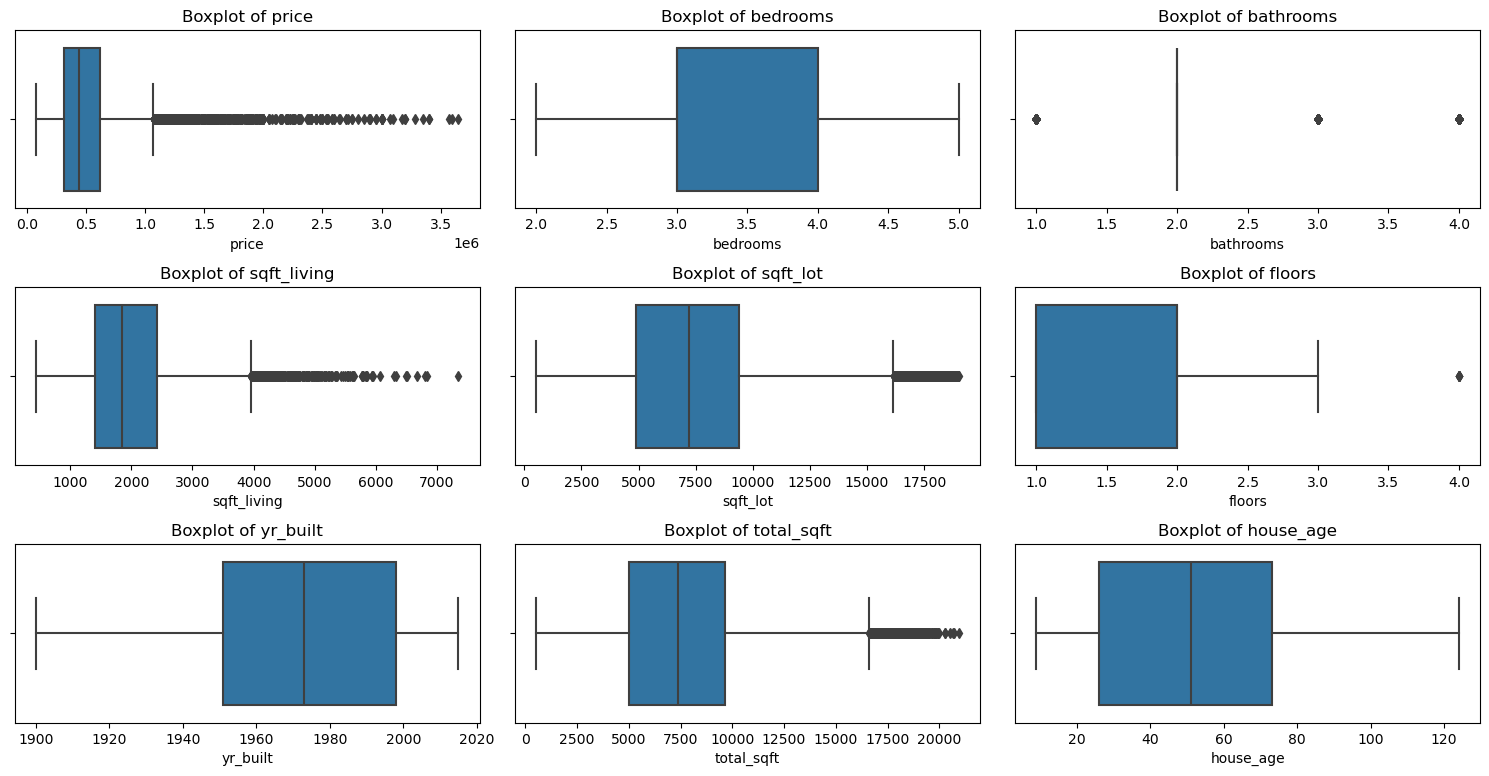

In [23]:
numeric_df = df.select_dtypes(include= 'number')

plt.figure(figsize= (15, 10))

for i, col in enumerate(numeric_df.columns):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x= numeric_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')

plt.tight_layout()
plt.show()

**7. Pair plot**

Check the distribution and relationship nature of the variables ...

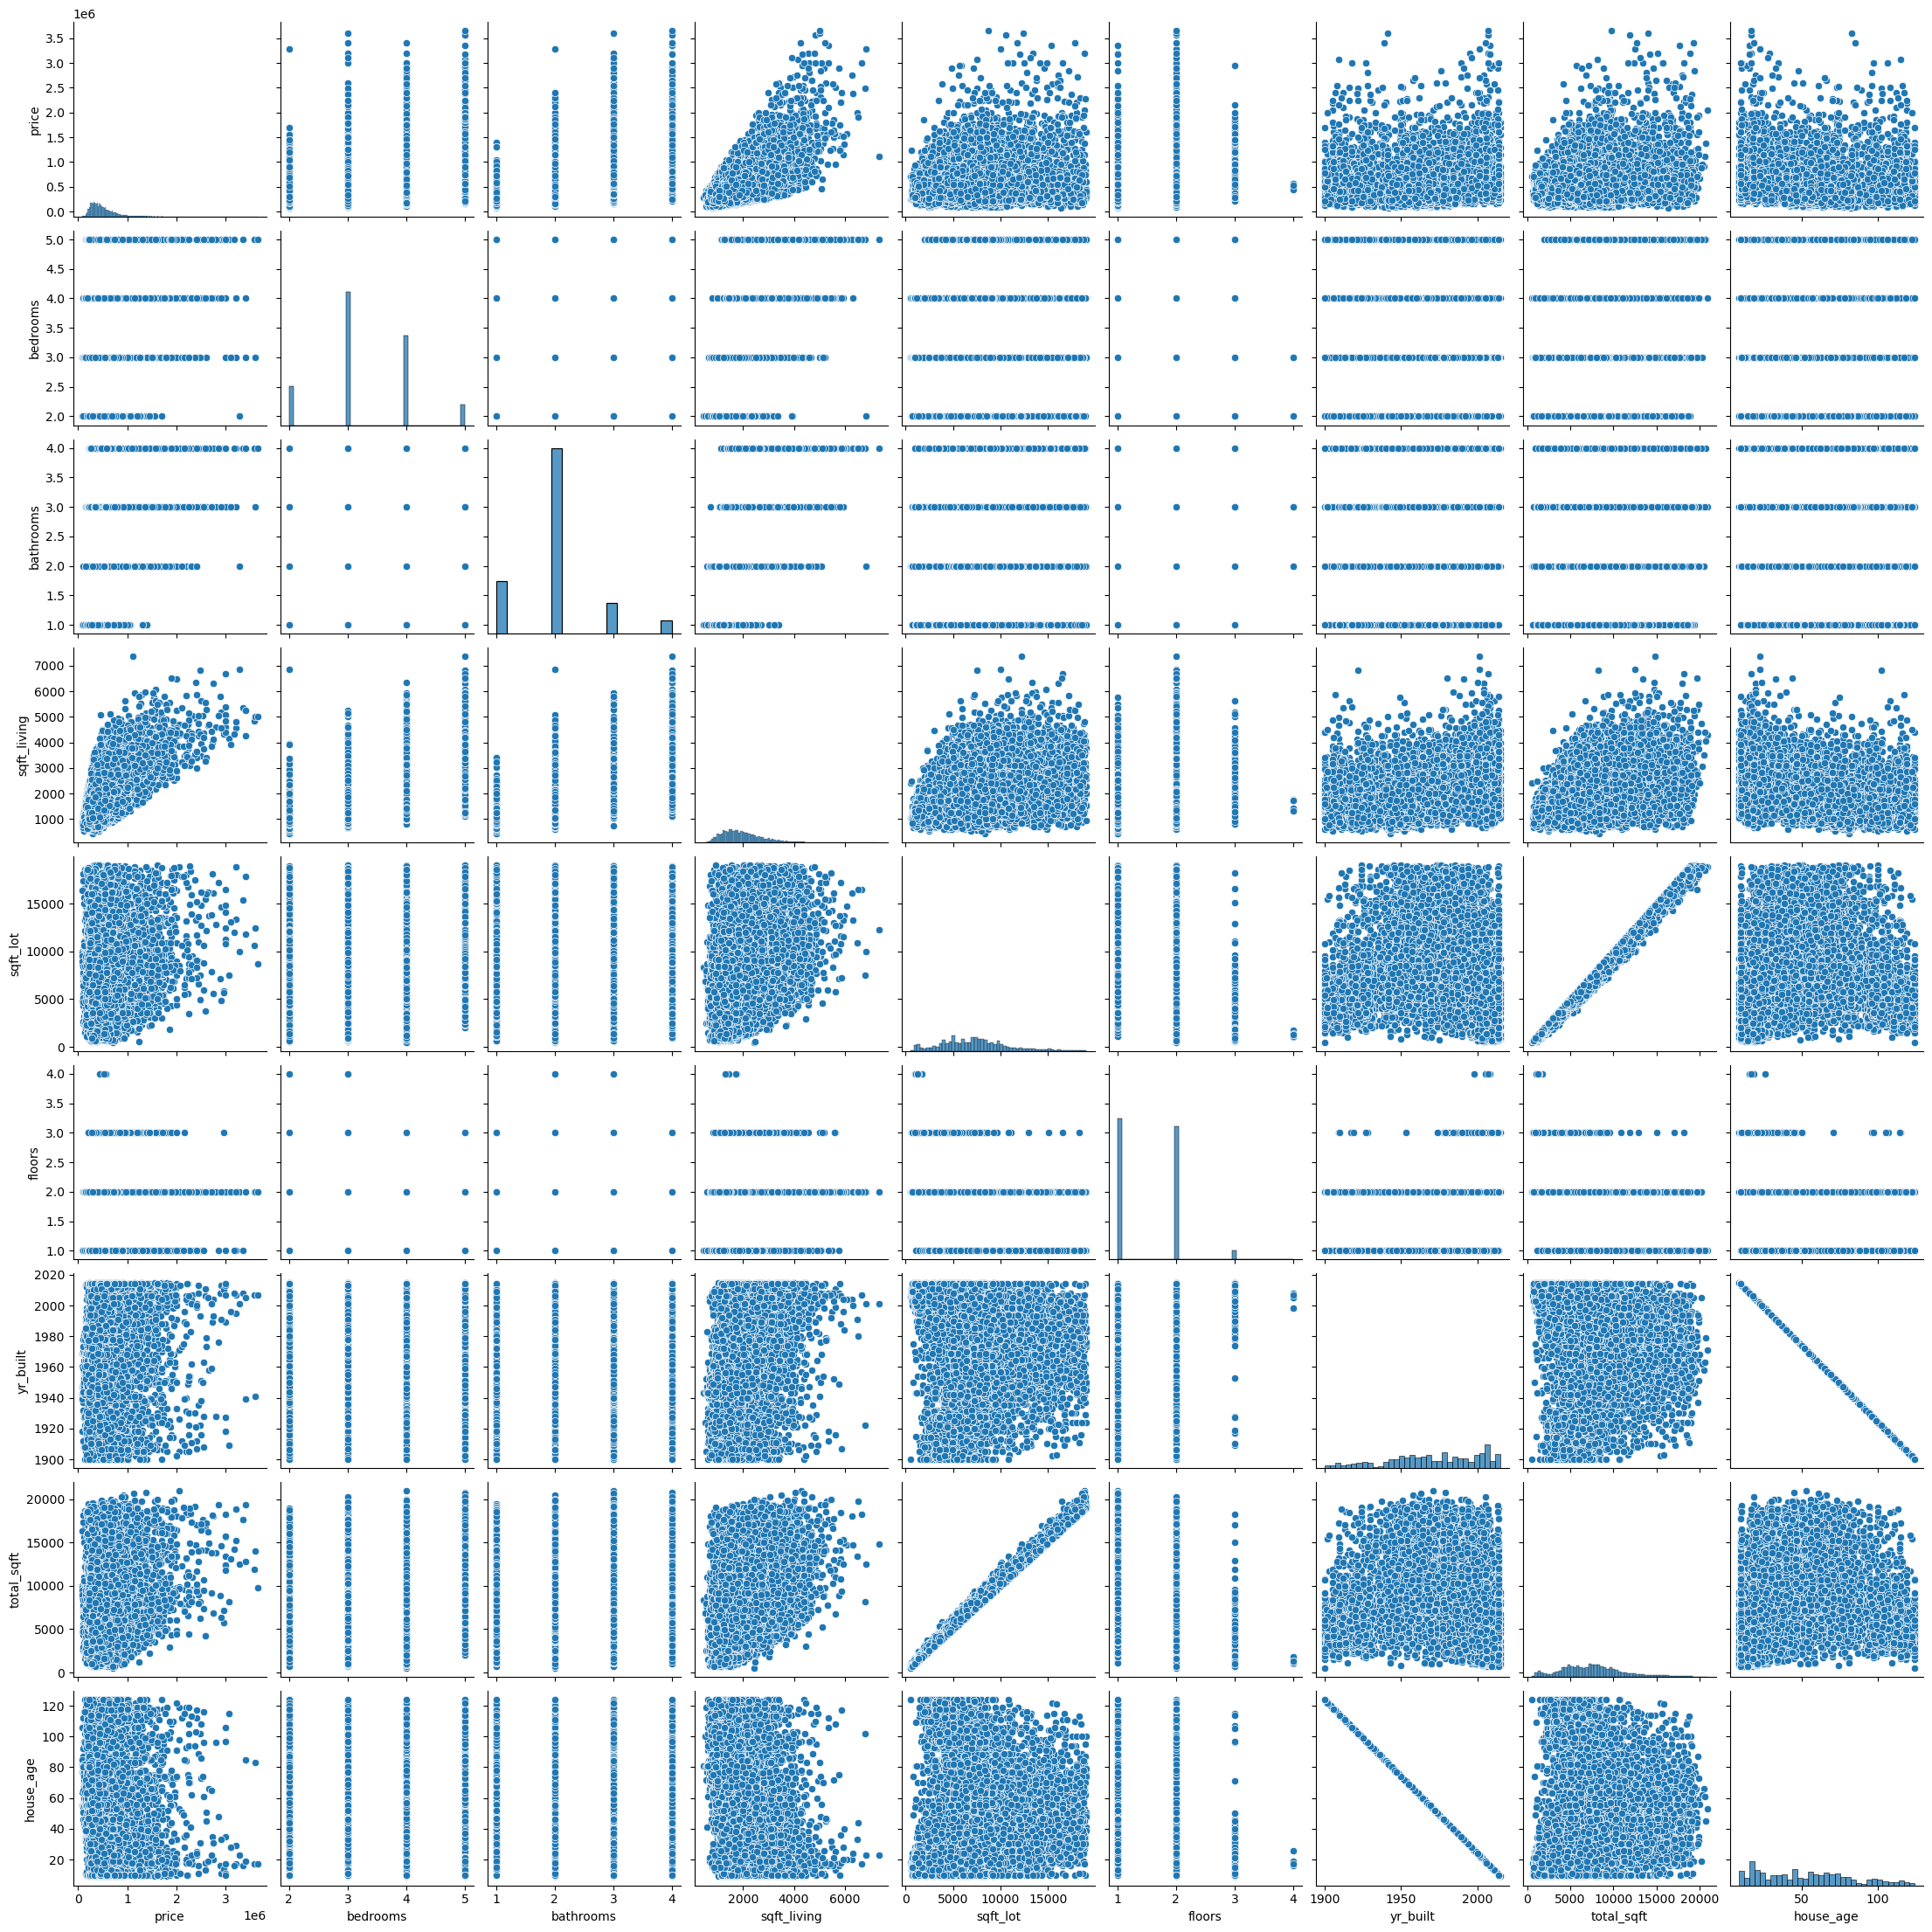

In [24]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category= FutureWarning)

    sns.pairplot(numeric_df)

categorical variables are present in the numeric df.

Check the correlations of the numeric variables to price ...

In [25]:
numeric_df = df.select_dtypes(include= 'number')

numeric_df.corr()['price']

price          1.000000
bedrooms       0.299697
bathrooms      0.475157
sqft_living    0.666490
sqft_lot       0.105810
floors         0.251189
yr_built       0.024579
total_sqft     0.139201
house_age     -0.024579
Name: price, dtype: float64

Sqft_living has the highest positive linear correlation to price.

On the other hand the house age has a negative correlation with price, an indication of non-linear relationship.

**8. Data Analysis**

    Objective 1:
What is the effect of yr_built on house prices?

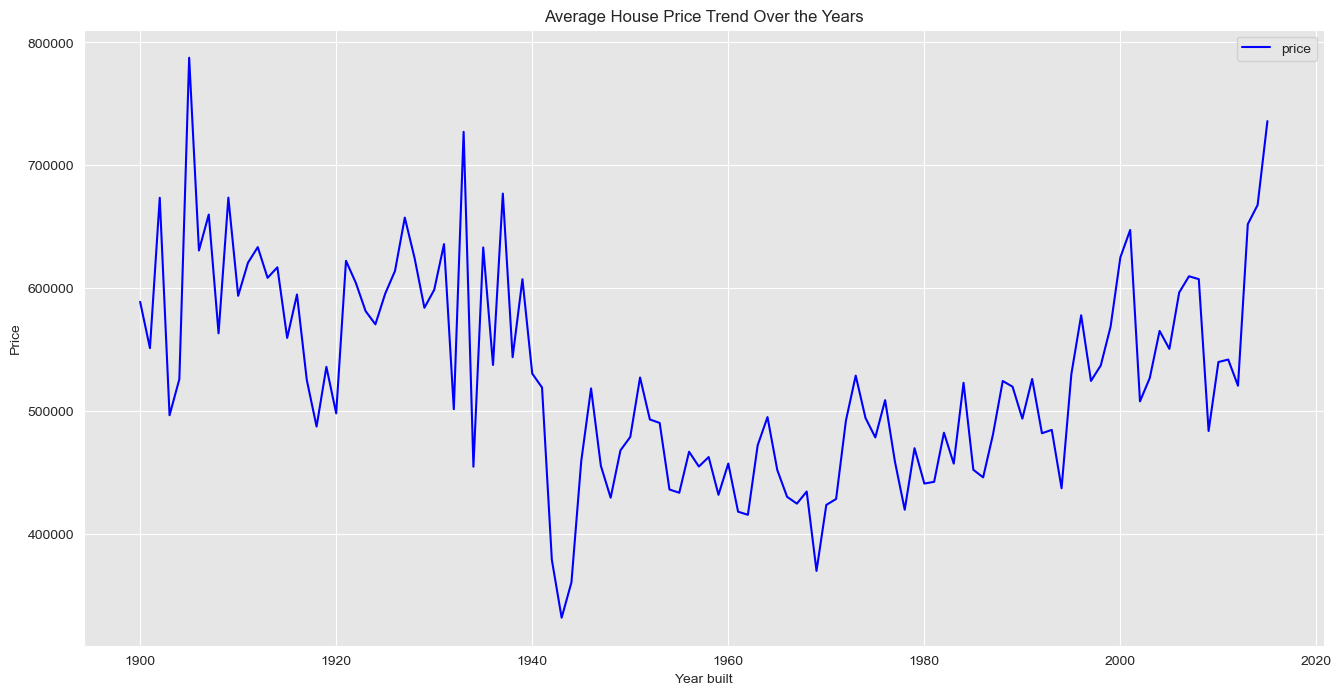

In [26]:
# Check the average house pricing trend over the years
df_avg_price = df.groupby('yr_built')['price'].mean().reset_index()

sns.set_style('darkgrid', {'axes.facecolor':'0.9'})

fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_avg_price['yr_built'], df_avg_price['price'], label= 'Price', color= 'b')
ax.set_xlabel('Year built')
ax.set_ylabel('Price')
ax.set_title('Average House Price Trend Over the Years')

ax.legend(['price'], loc= 1)

The house prices peaked at around 1905 and it was at its lowest at around 1944. 

There isn't a significant effect of the year built on price. In this case factors such as market prices at the time of the houses' market entry could have contributed to the pricing of the houses.

    Objective 2:

What is the effect of outdoor space on price?

1. Presence of waterfront.

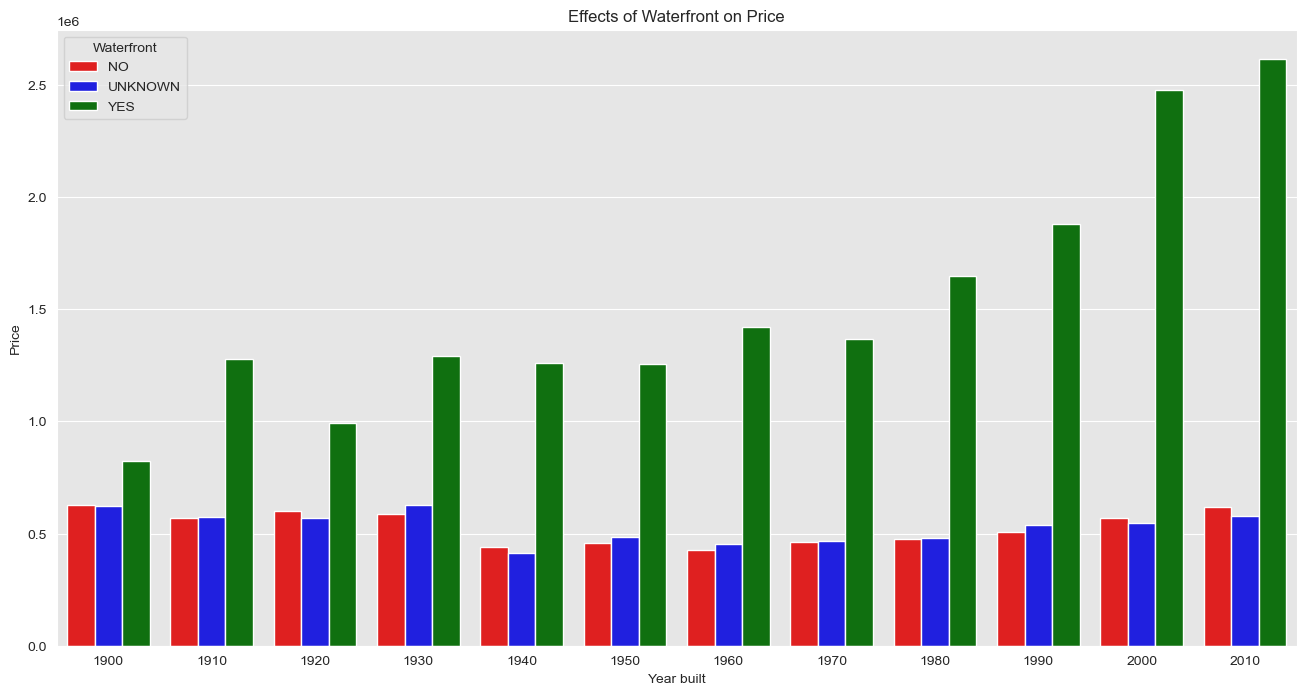

In [27]:
# Create decade column
df['decade'] = (df['yr_built'] // 10) * 10

# Agreggate the average price for aech year in each waterfront category
avg_price_df = df.groupby(['decade', 'waterfront'])['price'].mean().reset_index()

fig, ax = plt.subplots(figsize= (16, 8))

custom_palette = {'NO' : 'red', 'YES' : 'green', 'UNKNOWN' : 'blue'}
sns.barplot(data= avg_price_df, x= 'decade', y= 'price', hue= 'waterfront', palette= custom_palette, ax=ax)

ax.set_xlabel('Year built')
ax.set_ylabel('Price')
ax.set_title('Effects of Waterfront on Price')

plt.legend(title= 'Waterfront')
plt.show()

The presence of a waterfront has a significant contribution to the overall pricing of the houses. It's effect on price has been steadily increasing which could signify major preference by the buyer or increased land prices in waterfront areas.

2. Presence of a view.

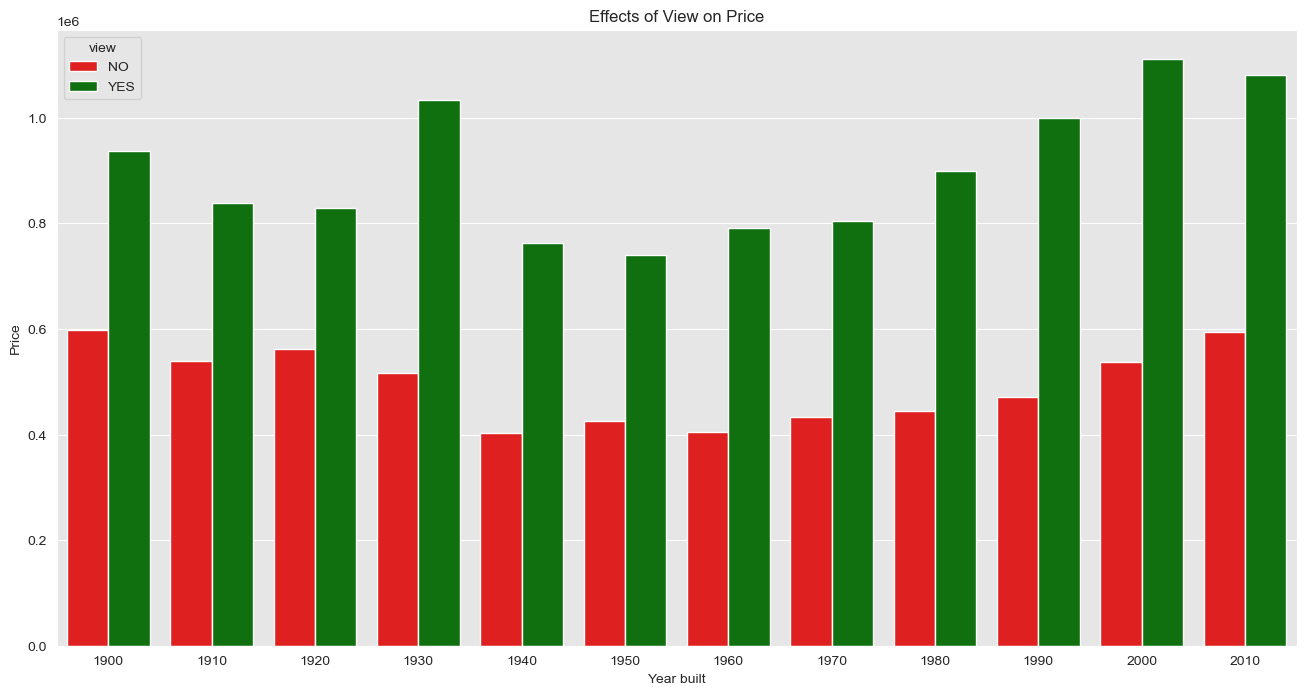

In [28]:
# Create decade column
df['decade'] = (df['yr_built'] // 10) * 10

# Agreggate the average price for aech year in each view category
avg_price_df = df.groupby(['decade', 'view'])['price'].mean().reset_index()

fig, ax = plt.subplots(figsize= (16, 8))

custom_palette = {'NO' : 'red', 'YES' : 'green'}
sns.barplot(data= avg_price_df, x= 'decade', y= 'price', hue= 'view', palette= custom_palette, ax=ax)

ax.set_xlabel('Year built')
ax.set_ylabel('Price')
ax.set_title('Effects of View on Price')

plt.legend(title= 'view')
plt.show()

The presence of a view has a significant effect on price. Houses with views are priced higher than houses without views.

Generally, the condition of the outdoor space affects house prices with the presence of a waterfront and a view significantly contributing to high house pricing.

    objective 3:
What is the effect of size on house pricing?

1. bedrooms

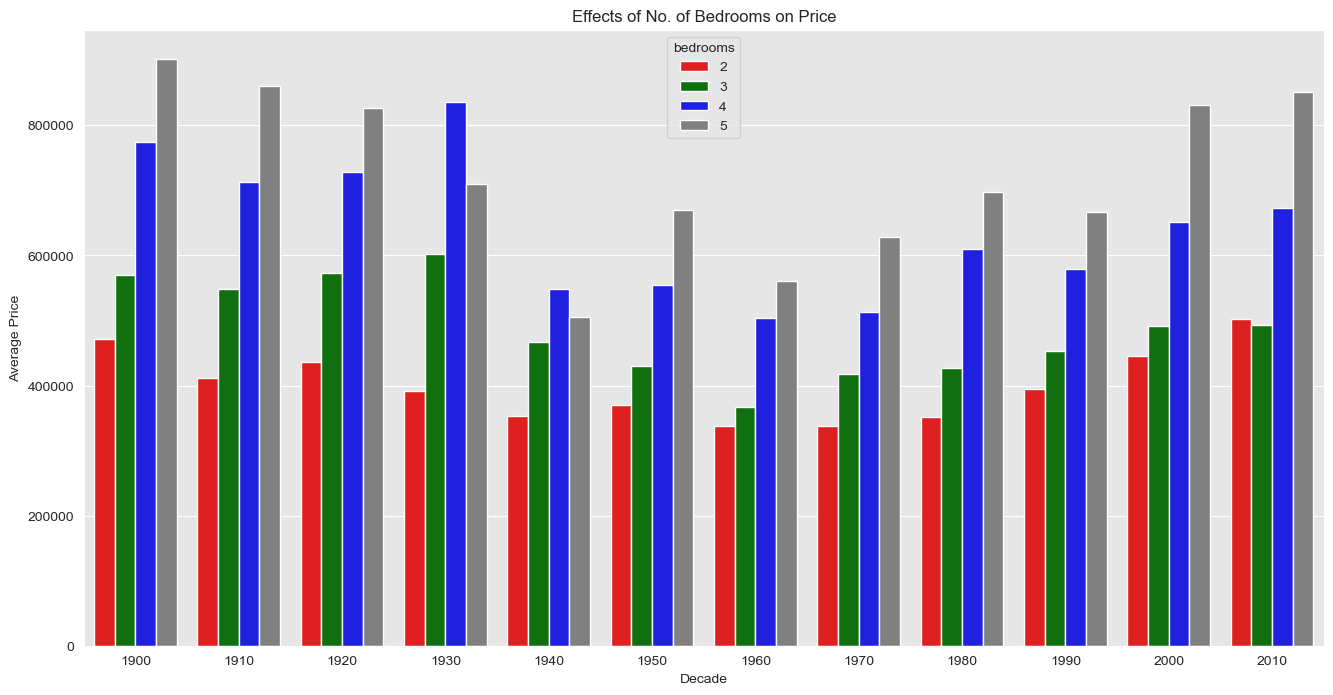

In [29]:
# Create decade column
df['decade'] = (df['yr_built'] // 10) * 10
df['bedrooms'] = df['bedrooms'].astype(str)
# Agreggate the average price for aech year in each waterfront category
avg_price_df = df.groupby(['decade', 'bedrooms'])['price'].mean().reset_index()

fig, ax = plt.subplots(figsize= (16, 8))

custom_palette = {'2' : 'red', '3' : 'green', '4' : 'blue', '5' : 'grey'}
sns.barplot(data= avg_price_df, x= 'decade', y= 'price', hue= 'bedrooms', palette= custom_palette, ax=ax)

ax.set_xlabel('Decade')
ax.set_ylabel('Average Price')
ax.set_title('Effects of No. of Bedrooms on Price')

plt.legend(title= 'bedrooms')
plt.show()

In [30]:
df.bedrooms.value_counts()

bedrooms
3    8739
4    5899
2    2548
5    1339
Name: count, dtype: int64

2. bathrooms

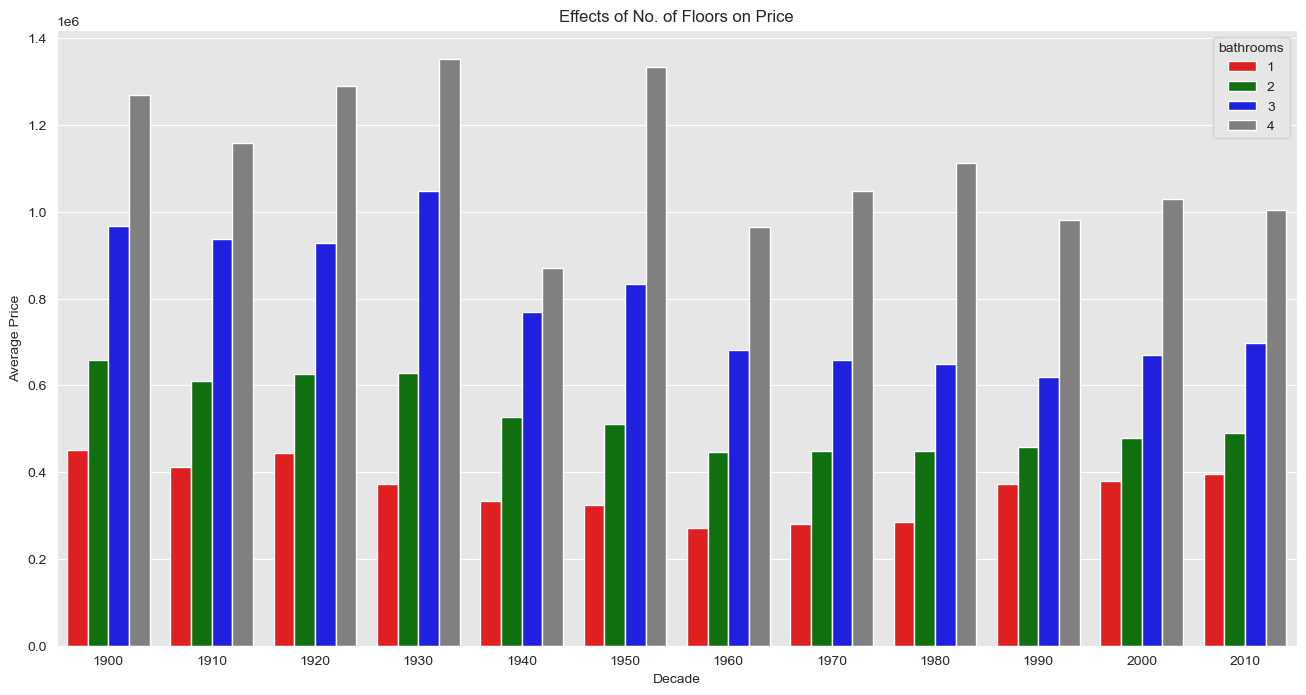

In [31]:
# Create decade column
df['decade'] = (df['yr_built'] // 10) * 10
df['bathrooms'] = df['bathrooms'].astype(str)

# Agreggate the average price for aech year in each bathrooms category
avg_price_df = df.groupby(['decade', 'bathrooms'])['price'].mean().reset_index()

fig, ax = plt.subplots(figsize= (16, 8))

custom_palette = {'1' : 'red', '2' : 'green', '3' : 'blue', '4' : 'grey'}
sns.barplot(data= avg_price_df, x= 'decade', y= 'price', hue= 'bathrooms', palette= custom_palette, ax=ax)

ax.set_xlabel('Decade')
ax.set_ylabel('Average Price')
ax.set_title('Effects of No. of Floors on Price')

plt.legend(title= 'bathrooms')
plt.show()

In [32]:
df.bathrooms.value_counts()

bathrooms
2    12153
1     3474
3     2026
4      872
Name: count, dtype: int64

3. floors 

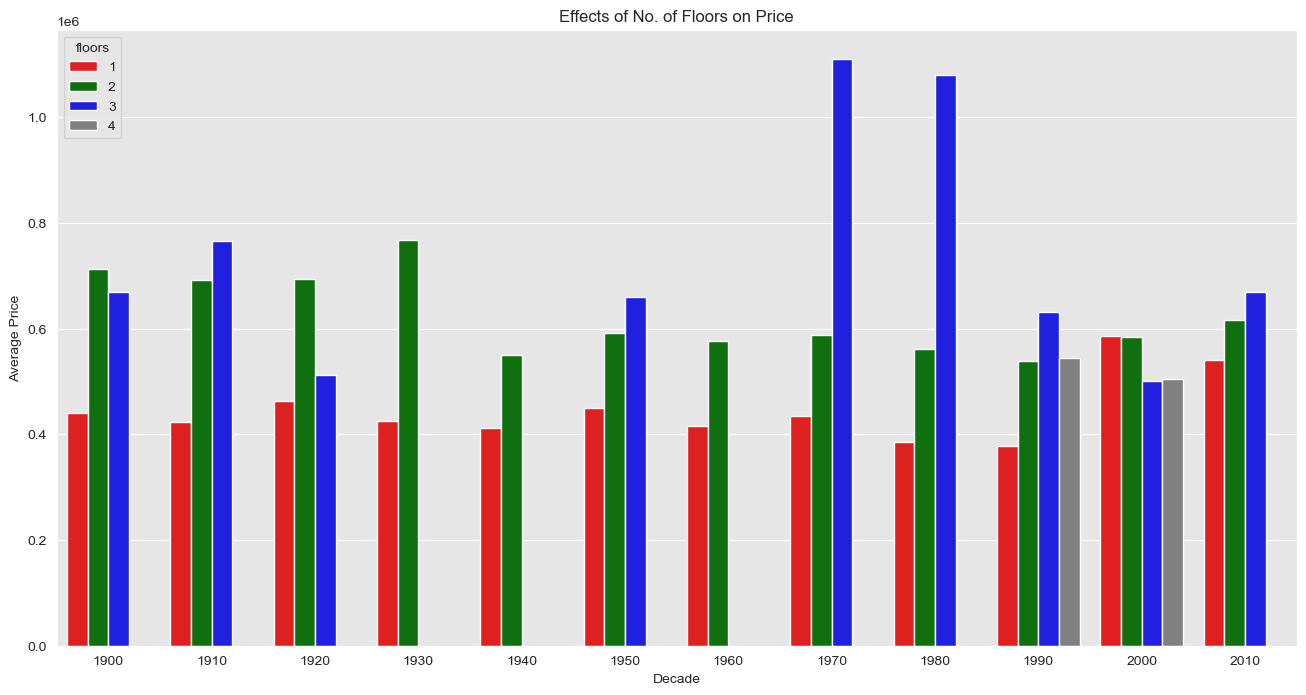

In [33]:
# Create decade column
df['decade'] = (df['yr_built'] // 10) * 10
df['floors'] = df['floors'].astype(str)

# Agreggate the average price for aech year in each floors category
avg_price_df = df.groupby(['decade', 'floors'])['price'].mean().reset_index()

fig, ax = plt.subplots(figsize= (16, 8))

custom_palette = {'1' : 'red', '2' : 'green', '3' : 'blue', '4' : 'grey'}
sns.barplot(data= avg_price_df, x= 'decade', y= 'price', hue= 'floors', palette= custom_palette, ax=ax)

ax.set_xlabel('Decade')
ax.set_ylabel('Average Price')
ax.set_title('Effects of No. of Floors on Price')

plt.legend(title= 'floors')
plt.show()

In [34]:
df.floors.value_counts()

floors
1    9220
2    8707
3     592
4       6
Name: count, dtype: int64

Month sold

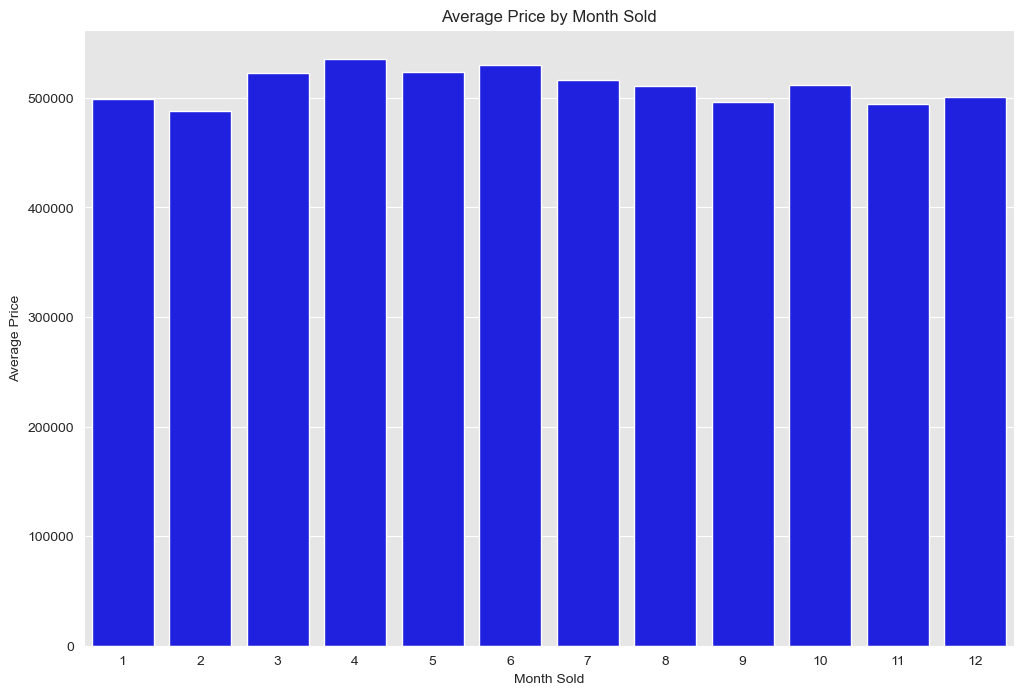

In [35]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')

df['month_sold'] = df['month_sold'].astype(int)

# Agreggate the average price for aech year in each monthsold category
avg_price_df = df.groupby(['month_sold'])['price'].mean().reset_index()

# Sort month sold in sequential order
avg_price_df['month_sold'] = pd.Categorical(avg_price_df['month_sold'], categories= range(1, 13), ordered= True)

fig, ax = plt.subplots(figsize= (12, 8))

sns.barplot(data= avg_price_df, x= 'month_sold', y= 'price', ax=ax, color= 'blue')

ax.set_xlabel('Month Sold')
ax.set_ylabel('Average Price')
ax.set_title('Average Price by Month Sold')

# plt.legend(title= 'months_sold')
plt.show()

In [36]:
df[['decade', 'month_sold']] = df[['decade', 'month_sold']].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18525 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18525 non-null  object 
 1   price        18525 non-null  float64
 2   bedrooms     18525 non-null  object 
 3   bathrooms    18525 non-null  object 
 4   sqft_living  18525 non-null  int64  
 5   sqft_lot     18525 non-null  int64  
 6   floors       18525 non-null  object 
 7   waterfront   18525 non-null  object 
 8   view         18525 non-null  object 
 9   condition    18525 non-null  object 
 10  grade        18525 non-null  object 
 11  yr_built     18525 non-null  int64  
 12  total_sqft   18525 non-null  float64
 13  house_age    18525 non-null  int64  
 14  month_sold   18525 non-null  object 
 15  decade       18525 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 2.4+ MB


OHE

In [37]:
df = df.drop(columns = ['id'])

categorical_df = df.select_dtypes(include= (object))
numeric_df = df.select_dtypes(include= (float, int))

print(categorical_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18525 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   bedrooms    18525 non-null  object
 1   bathrooms   18525 non-null  object
 2   floors      18525 non-null  object
 3   waterfront  18525 non-null  object
 4   view        18525 non-null  object
 5   condition   18525 non-null  object
 6   grade       18525 non-null  object
 7   month_sold  18525 non-null  object
 8   decade      18525 non-null  object
dtypes: object(9)
memory usage: 1.4+ MB
None


In [38]:
#OHE 
categorical_df = pd.get_dummies(categorical_df, drop_first= True, dtype= int)
categorical_df

,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2,bathrooms_3,bathrooms_4,floors_2,floors_3,floors_4,waterfront_UNKNOWN,...,decade_1920,decade_1930,decade_1940,decade_1950,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21593,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
21594,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21595,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [39]:
# Data preparation
df = pd.concat([numeric_df, categorical_df], axis= 1)
df.shape

(18525, 53)

In [40]:
correlations = df.drop('price', axis=1).corr().sum() / 30
correlations

sqft_living            0.134683
sqft_lot               0.089270
yr_built               0.026537
total_sqft             0.093634
house_age             -0.026537
bedrooms_3            -0.029560
bedrooms_4             0.048122
bedrooms_5             0.053738
bathrooms_2           -0.010148
bathrooms_3            0.049909
bathrooms_4            0.072772
floors_2               0.048431
floors_3               0.005005
floors_4               0.029598
waterfront_UNKNOWN     0.032044
waterfront_YES         0.055805
view_YES               0.082285
condition_Fair         0.024035
condition_Good         0.013672
condition_Poor         0.033212
condition_Very Good    0.023716
grade_ Better          0.049564
grade_ Excellent       0.061561
grade_ Fair            0.021246
grade_ Good            0.020391
grade_ Low             0.027725
grade_ Low Average    -0.017196
grade_ Luxury          0.045674
grade_ Mansion         0.037225
grade_ Very Good       0.063481
month_sold_2           0.005731
month_so

In [41]:
# log transformation

df = df.apply(lambda x: np.log(x + 1) if np.issubdtype(x.dtype, np.number) else x)


In [42]:

y = df['price']
X = df.drop(columns= ['price'])

In [43]:
# Xtest split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

Scale data

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [45]:
# Modeling

from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
# y_intercept
c = model.intercept_
c

190.97767754791172

In [47]:
# X_intercept
m = model.coef_
m

array([ 4.84665681e-01, -1.19914014e-01, -2.37865855e+01,  3.16524391e-02,
       -2.07762789e-01, -9.74243543e-02, -1.34569157e-01, -1.29340410e-01,
        5.54742004e-02,  1.18523982e-01,  2.23865692e-01, -8.26630561e-03,
        1.25233016e-01,  1.30302052e-01, -2.93266980e-03,  7.40909729e-01,
        2.11338521e-01, -2.03483965e-01,  7.43049315e-02, -5.56366866e-01,
        1.35866345e-01,  7.31672833e-01,  1.35332446e+00, -6.97193914e-01,
        3.29514008e-01, -9.44288000e-01, -3.91735225e-01,  1.68068905e+00,
        1.51352489e+00,  1.02508074e+00,  7.57843165e-03,  6.75492830e-02,
        1.05883432e-01,  3.82196266e-02,  2.28591125e-02,  2.04521417e-02,
        1.90437239e-02, -1.94161209e-04, -2.14775020e-03, -6.84234290e-03,
       -9.39182601e-03,  6.15675393e-02,  2.43865321e-01,  2.55058647e-01,
        3.83444458e-01,  3.68244595e-01,  2.98717548e-01,  3.67347128e-01,
        4.37060930e-01,  3.81601378e-01,  5.09887245e-01,  4.91508364e-01])

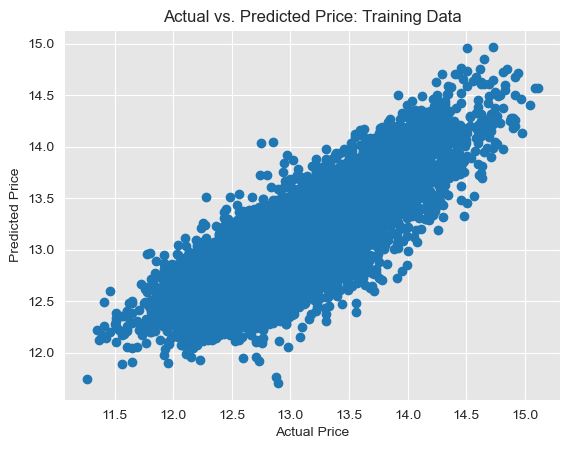

In [48]:
# Verify if the model is working using the training set

y_train_pred = model.predict(X_train)


plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price: Training Data')

plt.show()

In [49]:
# Accuracy score of the model
from sklearn.metrics import r2_score

r2_score(y_train, y_train_pred)

0.6495057294297648

66.62% of the variance in the dependent variable (y-Price) is explained by the independent variables (X).

Generally the model is moderately fit to the data, however 34.09% of the variance is not captured by the model. Therefore there is room for improvement.

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)

print('mse:', mse)
print('mae:', mae)

mse: 0.08861650035879041
mae: 0.23681693726103495


The average absolute difference of y_train and y_train_pred is at 122453.1102231508. This indicates that on average the model predictions are off by 122453.1102231508 units.

While on the other hand the average squares of the error is at 31924469645.27496, mse is highly affected by outliers, so this could be an indication of outliers on the dataset.

This is an indication that this model has significant prediction errors.